In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import xgboost
from sklearn.metrics import accuracy_score,confusion_matrix
import shap
import imageio
from PIL import Image

# Data import

In [39]:
col_names = ["Date","Time","Tag Comment","Motor Vol Flow","Motor Flow In","Motor Flow Out","Motor Surf top","Motor Surf Side","Temp Pt100 RTD winding U", \
            "Temp Pt100 RTD winding V", "Temp Pt100 RTD winding W", "Temp PTC thermistor winding", "Temp Feed-through plate", \
            "Lead intersection", "Temp Cable gland", "Temp Terminal box seal", "Temp Terminal", "Temp Ambient", "Frequency", "Voltage", \
            "Current", "Power factor", "Input power", "Output power", "Torque", "Speed", "Slip"]
df = pd.read_excel('./HDE-INT-MOT-20221028-01_HT8_03_N85z-4_OC2_50Hz_70C_R_000759_221107_100743.GEV.xlsx',header=32)
df.columns = col_names
df = df.drop([0],axis=0)
df = df.drop(["Tag Comment","Date","Temp PTC thermistor winding"],axis=1)
df["Time"] = list(np.arange(19206))
df = df[df["Frequency"]!="INVALID"]
print(df.shape)
df.head(5)
df = df.astype(float)
df = df.drop("Time", axis=1)
#df = df.drop("Temp Cable gland", axis=1)
df = df.drop("Temp Terminal box seal", axis=1)
#df = df.drop("Temp Feed-through plate", axis=1)
#df = df.drop("Temp Pt100 RTD winding U", axis=1)
#df = df.drop("Temp Ambient", axis=1)
#df = df.drop("Temp Pt100 RTD winding W", axis=1)
#df = df.drop("Temp Pt100 RTD winding V", axis=1)

(19204, 24)


# SHAP

In [ ]:

for name in col_names:
    if name in df.columns:
        y = df[name]
        X = df.drop(name, axis=1)
        model = xgboost.XGBRegressor().fit(X, y)

        explainer = shap.Explainer(model)
        shap_values = explainer(X)

        shap.plots.bar(shap_values, show=False)
        plt.savefig("./shap_plots/bar_plots/" + name + ".png", bbox_inches='tight')
        plt.close()

# Create Images

In [40]:
y = df["Temp Terminal"]
X = df.drop("Temp Terminal", axis=1)
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
 
for num in range(20):
    plt.figure(figsize=(1078, 600))
    shap.plots.waterfall(shap_values[num * 1000], show=False)
    plt.savefig("./shap_plots/temp" + str(num) + ".png", bbox_inches='tight')
    plt.close()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


# GIF

In [42]:
gif = "./tempterminal.gif"
images_data = []

for num in range(20):
    data = imageio.imread("./shap_plots/temp" + str(num) + ".png")
    images_data.append(data)

imageio.mimwrite(gif, images_data, format= '.gif', fps = 0.5)


Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


# Resize

In [41]:
for num in range(20):
    path = "./shap_plots/temp" + str(num) + ".png"
    image = Image.open(path)
    image = image.resize((1078,600))
    image.save(path)


# Scatterplot Analysis

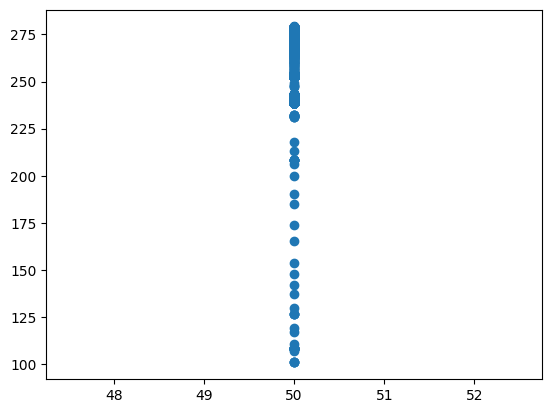

In [9]:
plt.scatter(df["Frequency"],df["Current"])

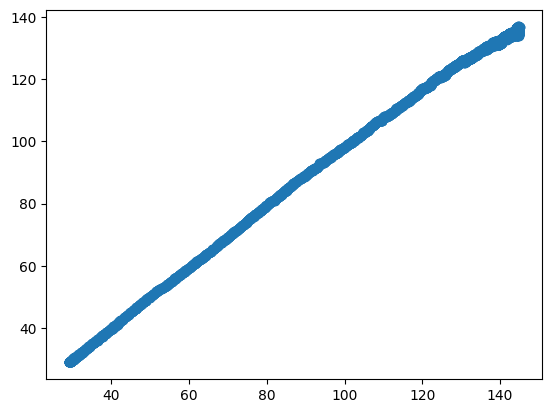

In [12]:
plt.scatter(df["Motor Surf top"],df["Motor Surf Side"])

[]

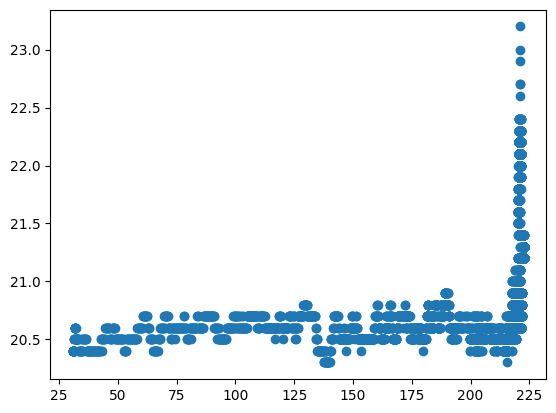

In [13]:
plt.scatter(df["Temp Pt100 RTD winding U"],df["Temp Ambient"])
plt.plot()


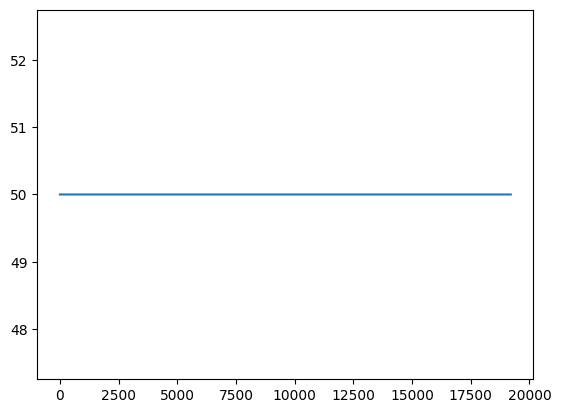

In [15]:
plt.plot(df["Frequency"])